In [103]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from patsy import dmatrices
from matplotlib import pyplot
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [104]:
#Chargement des données 
dataBoursier=pd.read_csv("data/ES=F.csv")
#dataPetrole=pd.read_csv("data/CL=F.csv")
#dataOr=pd.read_csv("data/GC=F.csv")

In [105]:
#ind=pd.date_range('12/01/2016', periods=2)

#dataBoursier.Index=ind
#dataBoursier

#dataBoursier=pd.DataFrame(dataBoursier,index=ind, columns=['Open'=dataBoursier['Open'], 'High', 'Low','Close','Adj.Close','Volume'])
dataBoursier.reset_index(drop=True)
#del dataBoursier['index']
dataBoursier

,Date,Open,High,Low,Close,Adj.Close,Volume
0,2016-12-01,2199.50,2203.00,2186.00,2192.00,2192.00,1960189.0
1,2016-12-02,2190.50,2197.25,2184.25,2192.00,2192.00,2148721.0
2,2016-12-04,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-12-05,2184.00,2208.75,2179.00,2204.25,2204.25,1682042.0
4,2016-12-06,2205.00,2212.00,2200.25,2210.00,2210.00,1663731.0
...,...,...,...,...,...,...,...
323,2017-12-24,NaN,NaN,NaN,NaN,NaN,NaN
324,2017-12-26,2686.75,2689.50,2683.50,2687.00,2687.00,360430.0
325,2017-12-27,2687.50,2691.00,2681.50,2685.50,2685.50,376101.0
326,2017-12-28,2684.00,2689.00,2683.00,2685.75,2685.75,666329.0


In [106]:
dataBoursier

,Date,Open,High,Low,Close,Adj.Close,Volume
0,2016-12-01,2199.50,2203.00,2186.00,2192.00,2192.00,1960189.0
1,2016-12-02,2190.50,2197.25,2184.25,2192.00,2192.00,2148721.0
2,2016-12-04,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-12-05,2184.00,2208.75,2179.00,2204.25,2204.25,1682042.0
4,2016-12-06,2205.00,2212.00,2200.25,2210.00,2210.00,1663731.0
...,...,...,...,...,...,...,...
323,2017-12-24,NaN,NaN,NaN,NaN,NaN,NaN
324,2017-12-26,2686.75,2689.50,2683.50,2687.00,2687.00,360430.0
325,2017-12-27,2687.50,2691.00,2681.50,2685.50,2685.50,376101.0
326,2017-12-28,2684.00,2689.00,2683.00,2685.75,2685.75,666329.0


In [107]:
#Nombre de valeur manquante dans les indice boursier
print(len(dataBoursier) - dataBoursier.count())

Date          0
Open         58
High         58
Low          58
Close        58
Adj.Close    58
Volume       58
dtype: int64


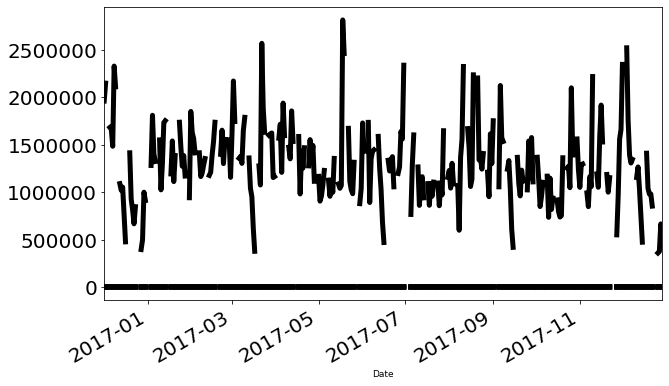

In [108]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('data/ES=F.csv', header=0, index_col=0, parse_dates=True, squeeze=False)
ser=series.head(50)

series.plot(figsize=(10, 6),style='k-',linewidth=5, fontsize=20)
pyplot.legend().set_visible(False)#Masquer la légende
pyplot.show()

In [109]:
#pretraitement des données 
# remplacement des valeurs manques par la dernière valeur non nulle de la serie 
dataBoursier=dataBoursier.fillna(method='ffill',inplace=False)
#dataPetrole=dataPetrole.fillna(method='ffill',inplace=False)
#dataOr=dataOr.fillna(method='ffill',inplace=False)

In [110]:
dataBoursier

,Date,Open,High,Low,Close,Adj.Close,Volume
0,2016-12-01,2199.50,2203.00,2186.00,2192.00,2192.00,1960189.0
1,2016-12-02,2190.50,2197.25,2184.25,2192.00,2192.00,2148721.0
2,2016-12-04,2190.50,2197.25,2184.25,2192.00,2192.00,2148721.0
3,2016-12-05,2184.00,2208.75,2179.00,2204.25,2204.25,1682042.0
4,2016-12-06,2205.00,2212.00,2200.25,2210.00,2210.00,1663731.0
...,...,...,...,...,...,...,...
323,2017-12-24,2686.75,2691.50,2682.25,2686.00,2686.00,853748.0
324,2017-12-26,2686.75,2689.50,2683.50,2687.00,2687.00,360430.0
325,2017-12-27,2687.50,2691.00,2681.50,2685.50,2685.50,376101.0
326,2017-12-28,2684.00,2689.00,2683.00,2685.75,2685.75,666329.0


In [111]:
def createMACD(df):
    
    df['e26'] = pd.Series.ewm(df['close'], span=26).mean()
    df['e12'] = pd.Series.ewm(df['close'], span=12).mean()
    df['MACD'] = df['e12'] - df['e26']
    return df

def calculeRSI (df, time_window):
    diff = df.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    # check pandas documentation for ewm
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

def afficherRSI(df):
    plt.figure(figsize=(15,5))
    plt.plot(df['Date'], df['Adj Close'])
    plt.title('Price chart (Adj Close)')
    plt.show()


    # plot correspondingRSI values and significant levels
    plt.figure(figsize=(15,5))
    plt.title('RSI chart')
    plt.plot(df['Date'], df['RSI'])

    plt.axhline(0, linestyle='--', alpha=0.1)
    plt.axhline(20, linestyle='--', alpha=0.5)
    plt.axhline(30, linestyle='--')

    plt.axhline(70, linestyle='--')
    plt.axhline(80, linestyle='--', alpha=0.5)
    plt.axhline(100, linestyle='--', alpha=0.1)
    plt.show()
    return 0


In [112]:
# Relative Strength Index
# Avg(PriceUp)/(Avg(PriceUP)+Avg(PriceDown)*100
# Where: PriceUp(t)=1*(Price(t)-Price(t-1)){Price(t)- Price(t-1)>0};
#        PriceDown(t)=-1*(Price(t)-Price(t-1)){Price(t)- Price(t-1)<0};

def rsi(values):
    up = values[values>0].mean()
    down = -1*values[values<0].mean()
    return 100 * up / (up + down)

In [113]:
dataBoursier

,Date,Open,High,Low,Close,Adj.Close,Volume
0,2016-12-01,2199.50,2203.00,2186.00,2192.00,2192.00,1960189.0
1,2016-12-02,2190.50,2197.25,2184.25,2192.00,2192.00,2148721.0
2,2016-12-04,2190.50,2197.25,2184.25,2192.00,2192.00,2148721.0
3,2016-12-05,2184.00,2208.75,2179.00,2204.25,2204.25,1682042.0
4,2016-12-06,2205.00,2212.00,2200.25,2210.00,2210.00,1663731.0
...,...,...,...,...,...,...,...
323,2017-12-24,2686.75,2691.50,2682.25,2686.00,2686.00,853748.0
324,2017-12-26,2686.75,2689.50,2683.50,2687.00,2687.00,360430.0
325,2017-12-27,2687.50,2691.00,2681.50,2685.50,2685.50,376101.0
326,2017-12-28,2684.00,2689.00,2683.00,2685.75,2685.75,666329.0


In [114]:
             ###Générer les indicateurs economiques
import pandas as pd
import matplotlib.pyplot as plt 
#La MACD : Moving Average Convergence/Divergence” est utilisé pour prévoir la tendance
#La MACD permet donc de visualiser des signaux d’achat ou de vente. 

#fonction pour créer MACD
def creationMACD(df):
    dff=pd.DataFrame()
    
    dff['e26'] = pd.Series.ewm(df['Close'], span=26).mean()#Moyenne Mobile Exponetielle de 26 jrs
    dff['e12'] = pd.Series.ewm(df['Close'], span=12).mean()#Moyenne Mobile Exponetielle de 12 jrs
    dff['MACD'] = dff['e12'] - dff['e26']#MACD= MME 12jrs-MME 26jrs
    return dff

#fonction pour Affciher 
def afficherGraphique(df, columns):
    df[columns].plot(figsize=(15,10))
    plt.grid(True)
    plt.show()

In [115]:
#ATR et TR

def wwma(values, n):
    return values.ewm(alpha=1/n, adjust=False).mean()

def atr(df, n=14):
    data = df.copy()
    high = data['High']
    low = data['Low']
    close = data['Close']
    data['tr0'] = abs(high - low)
    data['tr1'] = abs(high - close.shift())
    data['tr2'] = abs(low - close.shift())
    tr = data[['tr0', 'tr1', 'tr2']].max(axis=1)
    atr = wwma(tr, n)
    return atr

def tr(df, n=14):
    data = df.copy()
    high = data['High']
    low = data['Low']
    close = data['Close']
    data['tr0'] = abs(high - low)
    data['tr1'] = abs(high - close.shift())
    data['tr2'] = abs(low - close.shift())
    tr = data[['tr0', 'tr1', 'tr2']].max(axis=1)
    #atr = wwma(tr, n)
    return tr

def bbands(price, length=30, numsd=2):
    """ returns average, upper band, and lower band"""
    #ave = pd.stats.moments.rolling_mean(price,length)
    ave = price.rolling(window = length, center = False).mean()
    #sd = pd.stats.moments.rolling_std(price,length)
    sd = price.rolling(window = length, center = False).std()
    upband = ave + (sd*numsd)
    dnband = ave - (sd*numsd)
    return np.round(ave,3), np.round(upband,3), np.round(dnband,3)



# PASR

In [116]:
def psar(df, iaf = 0.02, maxaf = 0.2):
    length = len(df)
    dates = (df['Date'])
    high = (df['High'])
    low = (df['Low'])
    close = (df['Close'])
    psar = df['Close'][0:len(df['Close'])]
    psarbull = [None] * length
    psarbear = [None] * length
    bull = True
    af = iaf
    ep = df['Low'][0]
    hp = df['High'][0]
    lp = df['Low'][0]
    for i in range(2,length):
        if bull:
            psar[i] = psar[i - 1] + af * (hp - psar[i - 1])
        else:
            psar[i] = psar[i - 1] + af * (lp - psar[i - 1])
        reverse = False
        if bull:
            if df['Low'][i] < psar[i]:
                bull = False
                reverse = True
                psar[i] = hp
                lp = df['Low'][i]
                af = iaf
        else:
            if df['High'][i] > psar[i]:
                bull = True
                reverse = True
                psar[i] = lp
                hp = df['High'][i]
                af = iaf
        if not reverse:
            if bull:
                if df['High'][i] > hp:
                    hp = df['High'][i]
                    af = min(af + iaf, maxaf)
                if df['Low'][i - 1] < psar[i]:
                    psar[i] = df['Low'][i - 1]
                if df['Low'][i - 2] < psar[i]:
                    psar[i] = df['Low'][i - 2]
            else:
                if df['Low'][i] < lp:
                    lp = df['Low'][i]
                    af = min(af + iaf, maxaf)
                if df['High'][i - 1] > psar[i]:
                    psar[i] = df['High'][i - 1]
                if df['High'][i - 2] > psar[i]:
                    psar[i] = df['High'][i - 2]
        if bull:
            psarbull[i] = psar[i]
        else:
            psarbear[i] = psar[i]
#    df['psar'] = psar
    return psar
   

In [117]:
def chande_momentum_oscillator(df, n):
    """
    Chande Momentum Oscillator.
    Formula:
    cmo = 100 * ((sum_up - sum_down) / (sum_up + sum_down))
    """

    close_data = np.array(df['Close'])

    moving_period_diffs = [[(close_data[idx+1-n:idx+1][i] -
                 close_data[idx+1-n:idx+1][i-1]) for i in range(1, len(close_data[idx+1-n:idx+1]))] for idx in range(0, len(close_data))]

    sum_up = []
    sum_down = []
    for period_diffs in moving_period_diffs:
        ups = [val if val > 0 else 0 for val in period_diffs]
        sum_up.append(sum(ups))
        downs = [abs(val) if val < 0 else 0 for val in period_diffs]
        sum_down.append(sum(downs))

    sum_up = np.array(sum_up)
    sum_down = np.array(sum_down)

    cmo = pd.Series(100 * ((sum_up - sum_down) / (sum_up + sum_down)), name='Chande_'+str(n))
    df = df.join(cmo)
    return cmo

In [118]:
#Générer les indicateurs économiques

def genererIndicateur(df):
    dfIndicateurs=pd.DataFrame()  
    period=14
    dfIndicateurs['Close'] = df['Close']
    #fonction pour calculer les Moyennes Mobile Eponetielles et calcule de la MACD
    dfIndicateurs['e26'] = pd.Series.ewm(df['Close'], span=26).mean()#Moyenne Mobile Exponetielle de 26 jrs
    dfIndicateurs['e12'] = pd.Series.ewm(df['Close'], span=12).mean()#Moyenne Mobile Exponetielle de 12 jrs
    dfIndicateurs['MACD'] = dfIndicateurs['e26'] - dfIndicateurs['e12']#MACD= MME 12jrs-MME 26jrs
    #dfIndicateurs['RSI'] =calculeRSI(df['Close'], 14)
    #dfIndicateurs['ATR']=atr(df)
    #dfIndicateurs['TR']=tr(df)
    dfIndicateurs['SMI'] = (df['Close']-df['Close'].shift(1)).fillna(0)
    dfIndicateurs['RSI'] = dfIndicateurs['SMI'].rolling(center=False, window=14).apply(rsi).fillna(0)
    dfIndicateurs['HL'] = df['High'] - df['Low']
    dfIndicateurs['absHigh_C'] = abs(df['High'] - df['Close'].shift(1))
    dfIndicateurs['absLow_C'] = abs(df['Low'] - df['Close'].shift(1))
    dfIndicateurs['TR'] = dfIndicateurs[['HL','absHigh_C','absLow_C']].max(axis=1)
    dfIndicateurs['ATR'] = dfIndicateurs['TR'].rolling(window=14).mean()
    
    #Les bande de Bowlingers
    dfIndicateurs['BB_Middle'], dfIndicateurs['BB_Upper'], dfIndicateurs['BB_Lower'] = bbands(df['Close'], length=20, numsd=1)
    dfIndicateurs['BB_Middle'] = dfIndicateurs['BB_Middle'].fillna(0)
    dfIndicateurs['BB_Upper'] = dfIndicateurs['BB_Upper'].fillna(0)
    dfIndicateurs['BB_Lower'] = dfIndicateurs['BB_Lower'].fillna(0)
    
    #Parabolic SAR
    dfIndicateurs['PSAR']=psar(df)
    
    #
    dfIndicateurs ['CMO']= chande_momentum_oscillator(df, 14)
    
    #DMI-Directional Movement Index (ADX)
    dfIndicateurs ['VWAP']= np.cumsum(df['Volume'] * (df['High'] + df['Low'])/2) / np.cumsum(df['Volume'])
    dfIndicateurs['UpMove'] = df['High'] - df['High'].shift(1)
    dfIndicateurs['DownMove'] = df['Low'].shift(1) - df['Low']
    dfIndicateurs['Zero'] = 0
    
    #calcul du ADX-   Average Directional Index 
    dfIndicateurs['PlusDM'] = np.where((dfIndicateurs['UpMove'] > dfIndicateurs['DownMove']) & (dfIndicateurs['UpMove'] > dfIndicateurs['Zero']), dfIndicateurs['UpMove'], 0)
    dfIndicateurs['MinusDM'] = np.where((dfIndicateurs['UpMove'] < dfIndicateurs['DownMove']) & (dfIndicateurs['DownMove'] > dfIndicateurs['Zero']), dfIndicateurs['DownMove'], 0)

    dfIndicateurs['plusDI'] = 100 * (dfIndicateurs['PlusDM']/dfIndicateurs['ATR']).ewm(span=period,min_periods=0,adjust=True,ignore_na=False).mean()
    dfIndicateurs['minusDI'] = 100 * (dfIndicateurs['MinusDM']/dfIndicateurs['ATR']).ewm(span=period,min_periods=0,adjust=True,ignore_na=False).mean()

    dfIndicateurs['ADX'] = 100 * (abs((dfIndicateurs['plusDI'] - dfIndicateurs['minusDI'])/(dfIndicateurs['plusDI'] + dfIndicateurs['minusDI']))).ewm(span=period,min_periods=0,adjust=True,ignore_na=False).mean()

    
    #Calculation of Money Flow Index (MFI)   
    # typical price
    dfIndicateurs['TP'] = (df['High']+df['Low']+df['Close'])/3
    #raw money flow
    #dfIndicateurs['RMF'] = dfIndicateurs['TP'] * df['Volume']
    
    # positive and negative money flow
    dfIndicateurs['PNF'] = np.where(dfIndicateurs['TP'] > dfIndicateurs['TP'].shift(1), dfIndicateurs['TP'], 0)
    dfIndicateurs['NMF'] = np.where(dfIndicateurs['TP'] < dfIndicateurs['TP'].shift(1), dfIndicateurs['TP'], 0)

    # money flow ratio
    dfIndicateurs['MFR'] = dfIndicateurs['PNF'].rolling(window=14,center=False).sum()/dfIndicateurs['NMF'].rolling(window=14,center=False).sum()
    dfIndicateurs['MFI'] = 100 - 100 / (1 + dfIndicateurs['MFR'])
    
    #Calculation of Triple Exponential Moving Average
    dfIndicateurs['EMA'] = df['Close'].ewm(span=3,min_periods=0,adjust=True,ignore_na=False).mean()
    dfIndicateurs = dfIndicateurs.fillna(0)
    dfIndicateurs['TEMA'] = (3 * dfIndicateurs['EMA'] - 3 * dfIndicateurs['EMA'] * dfIndicateurs['EMA']) + (dfIndicateurs['EMA']*dfIndicateurs['EMA']*dfIndicateurs['EMA'])

    #MMS
    dfIndicateurs['MMS'] = df['Close'].rolling(14).mean()
    
    #Close Location Value
    dfIndicateurs['CLV'] = ((df['Close'] - df['Low'])-(df['High'] - df['Close']))/(df['High'] - df['Low'])
    
    
    #suppression des indicateurs intermediaires
    columns2Drop = ['TP','TR','MFR','NMF','PNF', 'UpMove', 'DownMove',  'PlusDM', 'MinusDM','plusDI','minusDI', 
                'Zero', 'HL', 'absHigh_C', 'absLow_C','PSAR']
    dfIndicateurs = dfIndicateurs.drop(labels = columns2Drop, axis=1)
    
    # remplacé le NaN par 0
    dfIndicateurs = dfIndicateurs.fillna(0)
    return dfIndicateurs


In [119]:
IndicateurBoursier=pd.DataFrame()
IndicateurBoursier = genererIndicateur(dataBoursier)
IndicateurBoursier

/home/jeremie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  from ipykernel import kernelapp as app
/home/jeremie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


,Close,e26,e12,MACD,SMI,RSI,ATR,BB_Middle,BB_Upper,BB_Lower,CMO,VWAP,ADX,MFI,EMA,TEMA,MMS,CLV
0,2192.00,2192.000000,2192.000000,0.000000,0.00,0.000000,0.000000,0.000,0.000,0.000,0.000000,2194.500000,0.000000,0.000000,2192.000000,1.051785e+10,0.000000,-0.294118
1,2192.00,2192.000000,2192.000000,0.000000,0.00,0.000000,0.000000,0.000,0.000,0.000,0.000000,2192.538968,0.000000,0.000000,2192.000000,1.051785e+10,0.000000,0.192308
2,2192.00,2192.000000,2192.000000,0.000000,0.00,0.000000,0.000000,0.000,0.000,0.000,0.000000,2191.924679,0.000000,0.000000,2198.285714,1.060864e+10,0.000000,1.884615
3,2204.25,2195.424565,2195.866846,-0.442282,12.25,0.000000,0.000000,0.000,0.000,0.000,0.000000,2192.337860,0.000000,0.000000,2190.800000,1.050058e+10,0.000000,-0.647059
4,2210.00,2198.804668,2199.706774,-0.902105,5.75,0.000000,0.000000,0.000,0.000,0.000,0.000000,2194.726398,0.000000,0.000000,2184.709677,1.041321e+10,0.000000,-4.617021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,2686.00,2652.404925,2673.798090,-21.393164,0.00,60.323887,15.964286,2661.238,2681.817,2640.658,42.839961,2420.318202,47.449249,76.854339,2652.998623,1.865176e+10,2644.662859,-7.167280
324,2687.00,2654.967523,2675.829153,-20.861629,1.00,56.637168,15.339286,2663.388,2684.315,2642.460,39.338222,2420.542524,47.860772,76.880489,2653.805212,1.866879e+10,2647.135131,-10.629399
325,2685.50,2657.229188,2677.316975,-20.087787,-1.50,60.778727,14.964286,2665.462,2686.424,2644.501,35.962354,2420.775977,46.370773,76.905455,2654.642389,1.868647e+10,2649.281528,-6.477986
326,2685.75,2659.341841,2678.614364,-19.272523,0.25,56.549185,14.285714,2667.838,2688.237,2647.438,32.752095,2421.188185,45.079441,76.924121,2655.486182,1.870430e+10,2651.147355,-9.890009


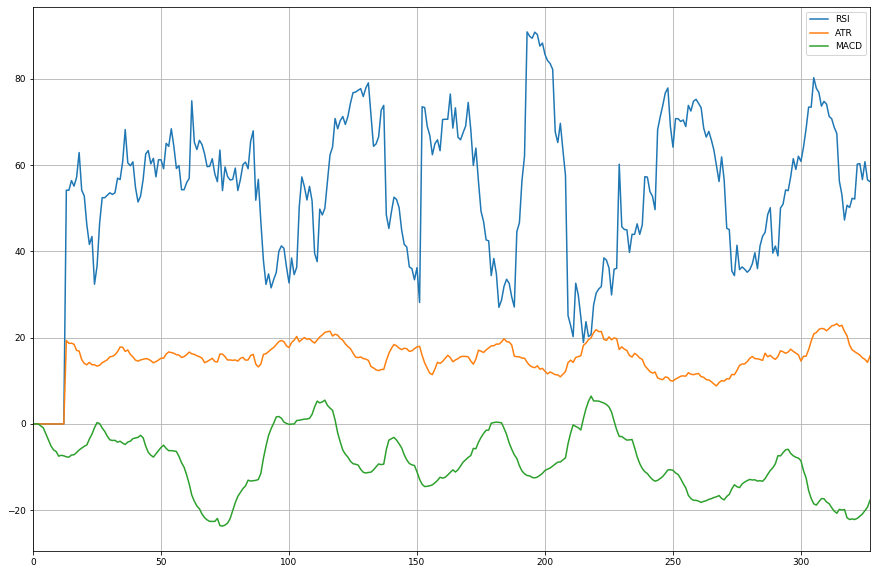

In [120]:
#initialisation des différents graphiques

#dataPetroleMACD = creationMACD(dataPetrole)
#dataOrMACD = creationMACD(dataOr)

#affichage
#afficherGraphique(IdicateurBoursier, [ 'e26', 'e12','Close'])
afficherGraphique(IndicateurBoursier, ['RSI', 'ATR','MACD'])
#afficherGraphique(IdicateurBoursier, ['RSI', 'ATR','MACD'])
 #plotData(df, ['close', 'e26', 'e12'])

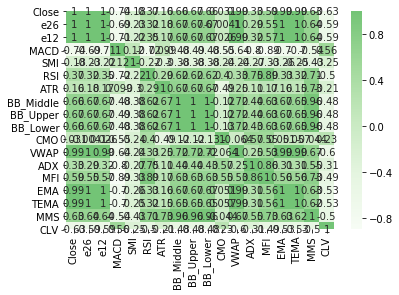

In [121]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt 
MatCorr=IndicateurBoursier.corr()
#MatCorr.plot(figsize=(15,10))
plt.rcParams["font.size"]=10
plt.size=(25,20)
#plt.show()
sn.heatmap(MatCorr.corr(),annot=True,cmap='Greens',center=True)

In [122]:
sn.heatmap

<function seaborn.matrix.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

In [123]:
MatCorr

,Close,e26,e12,MACD,SMI,RSI,ATR,BB_Middle,BB_Upper,BB_Lower,CMO,VWAP,ADX,MFI,EMA,TEMA,MMS,CLV
Close,1.000000,0.990570,0.994931,-0.524144,0.043096,0.267720,0.202862,0.548329,0.549161,0.547427,0.108953,0.964677,0.231700,0.461371,0.971922,0.973535,0.528299,-0.202906
e26,0.990570,1.000000,0.998475,-0.432303,-0.012945,0.225949,0.236291,0.570586,0.570692,0.570418,0.098591,0.982269,0.188074,0.428616,0.988077,0.987734,0.552332,-0.124651
e12,0.994931,0.998475,1.000000,-0.481422,-0.012397,0.248513,0.219927,0.567594,0.568009,0.567112,0.119477,0.975637,0.219079,0.452810,0.986950,0.987231,0.550161,-0.139602
MACD,-0.524144,-0.432303,-0.481422,1.000000,-0.003036,-0.471871,0.159258,-0.212004,-0.217111,-0.206809,-0.386243,-0.340775,-0.592439,-0.591177,-0.433361,-0.443386,-0.217065,0.301219
SMI,0.043096,-0.012945,-0.012397,-0.003036,1.000000,0.010838,-0.019081,-0.053692,-0.053158,-0.054226,-0.051924,-0.013563,-0.049742,-0.067230,-0.027218,-0.023070,-0.084786,-0.126484
RSI,0.267720,0.225949,0.248513,-0.471871,0.010838,1.000000,0.248082,0.469134,0.471525,0.466662,0.315194,0.245280,0.392327,0.674661,0.226441,0.213372,0.560930,-0.156993
ATR,0.202862,0.236291,0.219927,0.159258,-0.019081,0.248082,1.000000,0.537167,0.537552,0.536720,-0.160177,0.285989,0.173116,0.205599,0.241205,0.228587,0.703773,0.075671
BB_Middle,0.548329,0.570586,0.567594,-0.212004,-0.053692,0.469134,0.537167,1.000000,0.999947,0.999946,0.052491,0.630789,0.318419,0.493972,0.584569,0.559888,0.856661,0.002132
BB_Upper,0.549161,0.570692,0.568009,-0.217111,-0.053158,0.471525,0.537552,0.999947,1.000000,0.999786,0.054183,0.630606,0.323989,0.497043,0.584613,0.559988,0.856514,0.000096
BB_Lower,0.547427,0.570418,0.567112,-0.206809,-0.054226,0.466662,0.536720,0.999946,0.999786,1.000000,0.050772,0.630907,0.312744,0.490809,0.584461,0.559727,0.856717,0.004195


In [124]:
df=IndicateurBoursier
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
#df = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient(cmap='tab20_r').set_precision(2)
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Close,e26,e12,MACD,SMI,RSI,ATR,BB_Middle,BB_Upper,BB_Lower,CMO,VWAP,ADX,MFI,EMA,TEMA,MMS,CLV
Close,1,0.99,0.99,-0.52,0.043,0.27,0.2,0.55,0.55,0.55,0.11,0.96,0.23,0.46,0.97,0.97,0.53,-0.2
e26,0.99,1,1,-0.43,-0.013,0.23,0.24,0.57,0.57,0.57,0.099,0.98,0.19,0.43,0.99,0.99,0.55,-0.12
e12,0.99,1,1,-0.48,-0.012,0.25,0.22,0.57,0.57,0.57,0.12,0.98,0.22,0.45,0.99,0.99,0.55,-0.14
MACD,-0.52,-0.43,-0.48,1,-0.003,-0.47,0.16,-0.21,-0.22,-0.21,-0.39,-0.34,-0.59,-0.59,-0.43,-0.44,-0.22,0.3
SMI,0.043,-0.013,-0.012,-0.003,1,0.011,-0.019,-0.054,-0.053,-0.054,-0.052,-0.014,-0.05,-0.067,-0.027,-0.023,-0.085,-0.13
RSI,0.27,0.23,0.25,-0.47,0.011,1,0.25,0.47,0.47,0.47,0.32,0.25,0.39,0.67,0.23,0.21,0.56,-0.16
ATR,0.2,0.24,0.22,0.16,-0.019,0.25,1,0.54,0.54,0.54,-0.16,0.29,0.17,0.21,0.24,0.23,0.7,0.076
BB_Middle,0.55,0.57,0.57,-0.21,-0.054,0.47,0.54,1,1,1,0.052,0.63,0.32,0.49,0.58,0.56,0.86,0.0021
BB_Upper,0.55,0.57,0.57,-0.22,-0.053,0.47,0.54,1,1,1,0.054,0.63,0.32,0.5,0.58,0.56,0.86,9.6e-05
BB_Lower,0.55,0.57,0.57,-0.21,-0.054,0.47,0.54,1,1,1,0.051,0.63,0.31,0.49,0.58,0.56,0.86,0.0042


In [125]:
#interprétation
#chaque croisement des lignes des moyennes indique un changement de tendance
#si la moyenne sur 12 jours (e12) dépasse la moyenne sur 26 jours, cela signifier que nous avons une tendance haussière
#si la moyenne sur 26 jours (e26) dépasse la moyenne sur 12 jours, cela signifier que nous avons une tendance baissière
#Programatiquement, nous utiliserons le calcul e12 – e26 en observant son trajet autour de 0
IndicateurBoursier

,Close,e26,e12,MACD,SMI,RSI,ATR,BB_Middle,BB_Upper,BB_Lower,CMO,VWAP,ADX,MFI,EMA,TEMA,MMS,CLV
0,2192.00,2192.000000,2192.000000,0.000000,0.00,0.000000,0.000000,0.000,0.000,0.000,0.000000,2194.500000,0.000000,0.000000,2192.000000,1.051785e+10,0.000000,-0.294118
1,2192.00,2192.000000,2192.000000,0.000000,0.00,0.000000,0.000000,0.000,0.000,0.000,0.000000,2192.538968,0.000000,0.000000,2192.000000,1.051785e+10,0.000000,0.192308
2,2192.00,2192.000000,2192.000000,0.000000,0.00,0.000000,0.000000,0.000,0.000,0.000,0.000000,2191.924679,0.000000,0.000000,2198.285714,1.060864e+10,0.000000,1.884615
3,2204.25,2195.424565,2195.866846,-0.442282,12.25,0.000000,0.000000,0.000,0.000,0.000,0.000000,2192.337860,0.000000,0.000000,2190.800000,1.050058e+10,0.000000,-0.647059
4,2210.00,2198.804668,2199.706774,-0.902105,5.75,0.000000,0.000000,0.000,0.000,0.000,0.000000,2194.726398,0.000000,0.000000,2184.709677,1.041321e+10,0.000000,-4.617021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,2686.00,2652.404925,2673.798090,-21.393164,0.00,60.323887,15.964286,2661.238,2681.817,2640.658,42.839961,2420.318202,47.449249,76.854339,2652.998623,1.865176e+10,2644.662859,-7.167280
324,2687.00,2654.967523,2675.829153,-20.861629,1.00,56.637168,15.339286,2663.388,2684.315,2642.460,39.338222,2420.542524,47.860772,76.880489,2653.805212,1.866879e+10,2647.135131,-10.629399
325,2685.50,2657.229188,2677.316975,-20.087787,-1.50,60.778727,14.964286,2665.462,2686.424,2644.501,35.962354,2420.775977,46.370773,76.905455,2654.642389,1.868647e+10,2649.281528,-6.477986
326,2685.75,2659.341841,2678.614364,-19.272523,0.25,56.549185,14.285714,2667.838,2688.237,2647.438,32.752095,2421.188185,45.079441,76.924121,2655.486182,1.870430e+10,2651.147355,-9.890009


In [126]:
def addSAR(df):
    df.loc[0, 'AF'] =0.02
    df.loc[0, 'PSAR'] = df.loc[0, 'Low']
    df.loc[0, 'EP'] = df.loc[0, 'High']
    df.loc[0, 'PSARdir'] = "bull"

    for a in range(1, len(df)):

        if df.loc[a-1, 'PSARdir'] == 'bull':

            df.loc[a, 'PSAR'] = df.loc[a-1, 'PSAR'] + (df.loc[a-1, 'AF']*(df.loc[a-1, 'EP']-df.loc[a-1, 'PSAR']))            

            df.loc[a, 'PSARdir'] = "bull"

            if df.loc[a, 'Low'] < df.loc[a-1, 'PSAR']:
                df.loc[a, 'PSARdir'] = "bear"
                df.loc[a, 'PSAR'] = df.loc[a-1, 'EP']
                df.loc[a, 'EP'] = df.loc[a-1, 'Low']
                df.loc[a, 'AF'] = .02

            else:
                if df.loc[a, 'High'] > df.loc[a-1, 'EP']:
                    df.loc[a, 'EP'] = df.loc[a, 'High']
                    if df.loc[a-1, 'AF'] <= 0.18:
                        df.loc[a, 'AF'] =df.loc[a-1, 'AF'] + 0.02
                    else:
                        df.loc[a, 'AF'] = df.loc[a-1, 'AF']
                elif df.loc[a, 'High'] <= df.loc[a-1, 'EP']:
                    df.loc[a, 'AF'] = df.loc[a-1, 'AF']
                    df.loc[a, 'EP'] = df.loc[a-1, 'EP']               



        elif df.loc[a-1, 'PSARdir'] == 'bear':

            df.loc[a, 'PSAR'] = df.loc[a-1, 'PSAR'] - (df.loc[a-1, 'AF']*(df.loc[a-1, 'EP']-df.loc[a-1, 'PSAR']))

            df.loc[a, 'PSARdir'] = "bear"

            if df.loc[a, 'High'] > df.loc[a-1, 'PSAR']:
                df.loc[a, 'PSARdir'] = "bull"
                df.loc[a, 'PSAR'] = df.loc[a-1, 'EP']
                df.loc[a, 'EP'] = df.loc[a-1, 'High']
                df.loc[a, 'AF'] = .02

            else:
                if df.loc[a, 'Low'] < df.loc[a-1, 'EP']:
                    df.loc[a, 'EP'] = df.loc[a, 'Low']
                    if df.loc[a-1, 'AF'] <= 0.18:
                        df.loc[a, 'AF'] = df.loc[a-1, 'AF'] + 0.02
                    else:
                        df.loc[a, 'AF'] = df.loc[a-1, 'AF']

                elif df.loc[a, 'Low'] >= df.loc[a-1, 'EP']:
                    df.loc[a, 'AF'] = df.loc[a-1, 'AF']
                    df.loc[a, 'EP'] = df.loc[a-1, 'EP']           

    return df

In [127]:
#SAR=addSAR(dataBoursier)
#IndicateurBoursier['AF']=SAR['AF']
#IndicateurBoursier['PSAR']=SAR['PSAR']
#IndicateurBoursier['EP']=SAR['EP']
#IndicateurBoursier['PSARdir']=SAR['PSARdir']

#dataBoursier=dataBoursier.drop(['AF','PSAR','EP','PSARdir'], axis=1)
#IndicateurBoursier
#dataBoursier

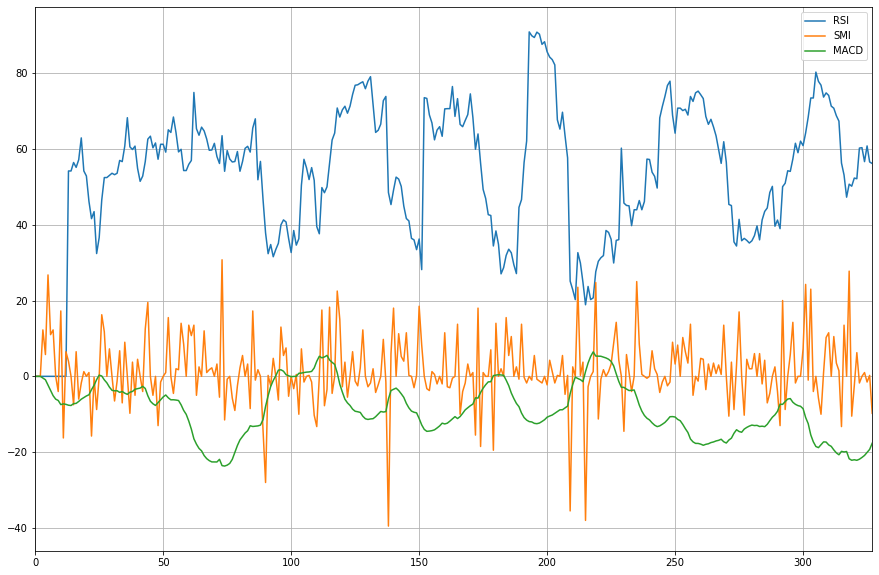

In [128]:
afficherGraphique(IndicateurBoursier, ['RSI','SMI','MACD'])

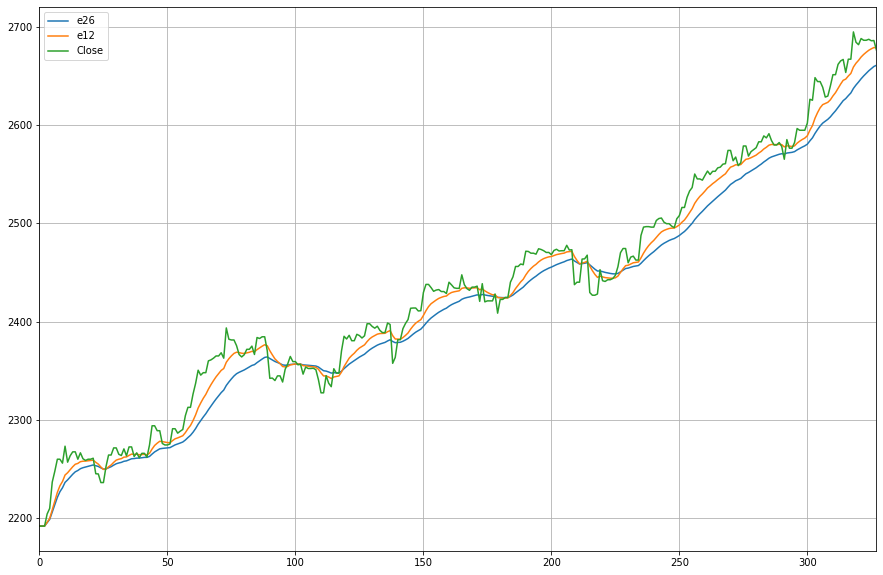

In [129]:
afficherGraphique(IndicateurBoursier, ['e26','e12','Close'])

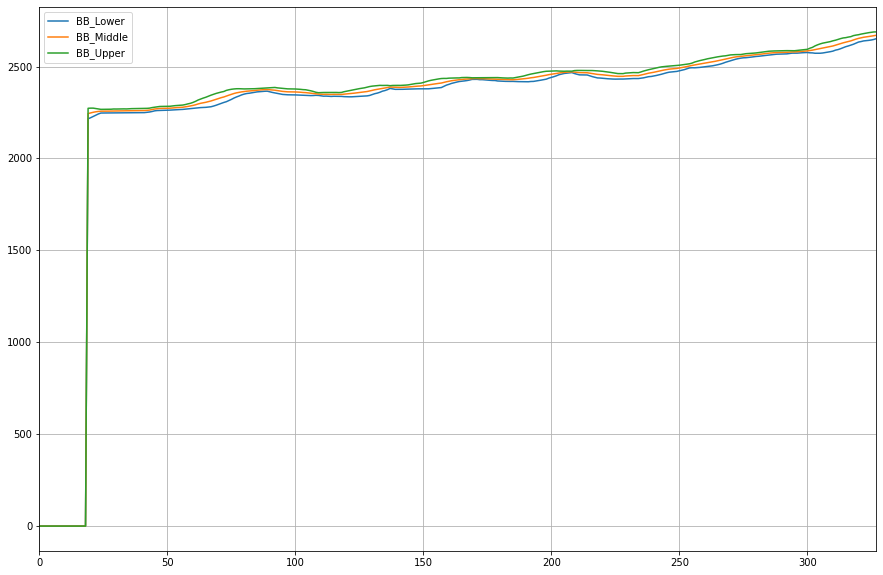

In [130]:
afficherGraphique(IndicateurBoursier, ['BB_Lower','BB_Middle','BB_Upper'])

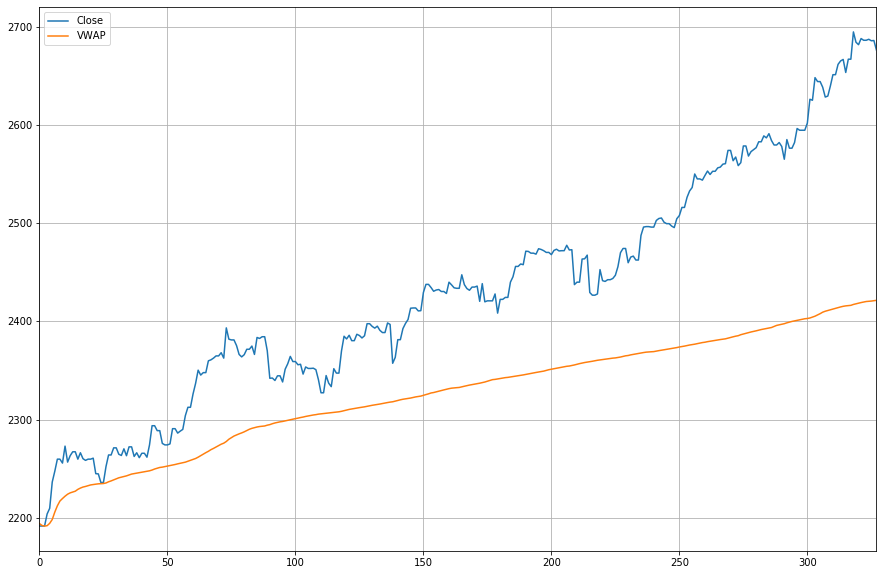

In [131]:
afficherGraphique(IndicateurBoursier, ['Close','VWAP'])

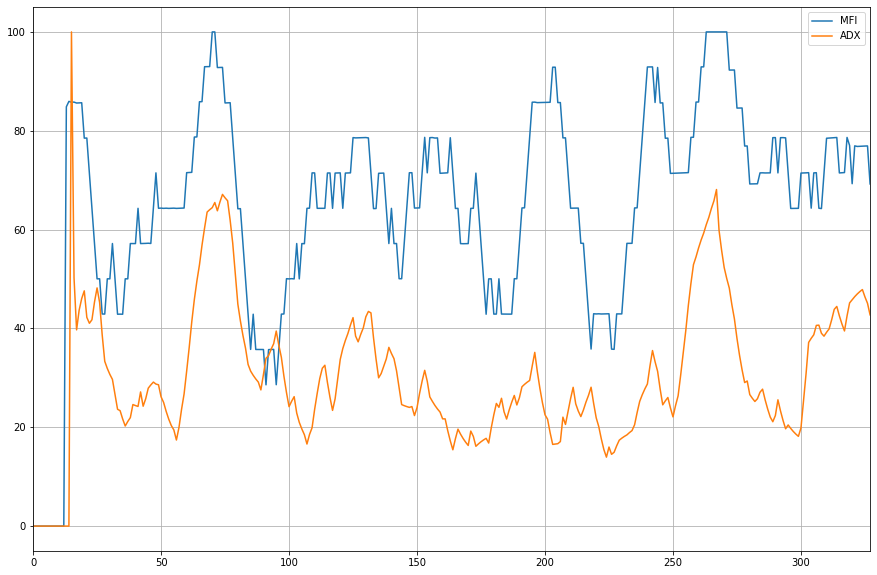

In [132]:
afficherGraphique(IndicateurBoursier, ['MFI','ADX'])

In [133]:
import urllib.request, urllib.error, urllib.parse
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
#from matplotlib.finance import candlestick_ohlc
import matplotlib
import pylab
matplotlib.rcParams.update({'font.size': 9})

# Affichage de la vaiation du prix à la cloture - les bande de bowling

/home/jeremie/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


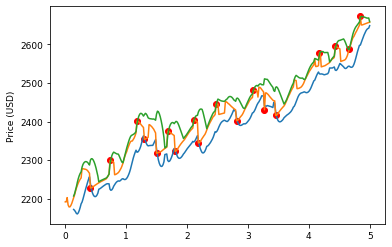

In [134]:
# import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

N = dataBoursier.shape[0]
XMAX = 5
WINMA = 10
ALPHA = 2

def get_bollinger(data, winma=100, alpha=2):
    ser = pd.Series(data)
    ma = ser.rolling(winma).mean()
    std = ser.rolling(winma).std()
    lower = pd.Series(ma - alpha*std).values
    upper = pd.Series(ma + alpha*std).values
    return lower, upper

def get_alerts(data, lower, upper):
    low = np.argwhere(data < lower)
    high = np.argwhere(data > upper)
    return low, high

if __name__=='__main__':

    X = np.linspace(0.0, XMAX, num=N)
    #data = np.sin(X) + np.random.random(N)
    data=dataBoursier['Close']
    lower, upper = get_bollinger(data, winma=WINMA, alpha=ALPHA)
    low, high = get_alerts(data, lower, upper)
    for i in low:
        plt.plot(X[i], data[i], 'ro')
    for i in high:
        plt.plot(X[i], data[i], 'ro')
    plt.plot(X, lower)
    plt.plot(X, data)
    plt.plot(X, upper)
    plt.ylabel('Price (USD)')
    plt.plot(figsize=(20,15))
    plt.show()

In [135]:
IndicateurBoursier

,Close,e26,e12,MACD,SMI,RSI,ATR,BB_Middle,BB_Upper,BB_Lower,CMO,VWAP,ADX,MFI,EMA,TEMA,MMS,CLV
0,2192.00,2192.000000,2192.000000,0.000000,0.00,0.000000,0.000000,0.000,0.000,0.000,0.000000,2194.500000,0.000000,0.000000,2192.000000,1.051785e+10,0.000000,-0.294118
1,2192.00,2192.000000,2192.000000,0.000000,0.00,0.000000,0.000000,0.000,0.000,0.000,0.000000,2192.538968,0.000000,0.000000,2192.000000,1.051785e+10,0.000000,0.192308
2,2192.00,2192.000000,2192.000000,0.000000,0.00,0.000000,0.000000,0.000,0.000,0.000,0.000000,2191.924679,0.000000,0.000000,2198.285714,1.060864e+10,0.000000,1.884615
3,2204.25,2195.424565,2195.866846,-0.442282,12.25,0.000000,0.000000,0.000,0.000,0.000,0.000000,2192.337860,0.000000,0.000000,2190.800000,1.050058e+10,0.000000,-0.647059
4,2210.00,2198.804668,2199.706774,-0.902105,5.75,0.000000,0.000000,0.000,0.000,0.000,0.000000,2194.726398,0.000000,0.000000,2184.709677,1.041321e+10,0.000000,-4.617021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,2686.00,2652.404925,2673.798090,-21.393164,0.00,60.323887,15.964286,2661.238,2681.817,2640.658,42.839961,2420.318202,47.449249,76.854339,2652.998623,1.865176e+10,2644.662859,-7.167280
324,2687.00,2654.967523,2675.829153,-20.861629,1.00,56.637168,15.339286,2663.388,2684.315,2642.460,39.338222,2420.542524,47.860772,76.880489,2653.805212,1.866879e+10,2647.135131,-10.629399
325,2685.50,2657.229188,2677.316975,-20.087787,-1.50,60.778727,14.964286,2665.462,2686.424,2644.501,35.962354,2420.775977,46.370773,76.905455,2654.642389,1.868647e+10,2649.281528,-6.477986
326,2685.75,2659.341841,2678.614364,-19.272523,0.25,56.549185,14.285714,2667.838,2688.237,2647.438,32.752095,2421.188185,45.079441,76.924121,2655.486182,1.870430e+10,2651.147355,-9.890009


In [136]:
IndicateurBoursier.columns

Index(['Close', 'e26', 'e12', 'MACD', 'SMI', 'RSI', 'ATR', 'BB_Middle',
       'BB_Upper', 'BB_Lower', 'CMO', 'VWAP', 'ADX', 'MFI', 'EMA', 'TEMA',
       'MMS', 'CLV'],
      dtype='object')

# La prédiction par tous les Indicateurs

In [137]:
#Division des données
from sklearn.model_selection import train_test_split, learning_curve

X = IndicateurBoursier.drop(['Close'], axis=1)
Y = IndicateurBoursier.Close

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

type(X_train)

pandas.core.frame.DataFrame

In [138]:
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.svm import SVR, SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer

# Prédiciton 1 (SVR) -- Support Vectore Regressor

In [139]:
# On crée le pipeline
num_vars = make_column_selector(dtype_include=np.number)
numerical_pipeline = make_pipeline(StandardScaler())

simpleImputer = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'))

preprocessor = make_column_transformer((numerical_pipeline, num_vars))

model_svr = make_pipeline(preprocessor, simpleImputer, SVR())

params = {'svr__kernel': ['rbf', 'linear'],
         'svr__gamma': ['scale', 'auto']}

grid_svr = GridSearchCV(model_svr, params, cv=5)

grid_svr.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fea20697710>)])),
  ('pipeline', Pipeline(steps=[('simpleimputer', SimpleImputer())])),
  ('svr', SVR())],
 'estimator__verbose': False,
 'estimator__columntransformer': ColumnTransformer(transformers=[('pipeline',
                                  Pipeline(steps=[('standardscaler',
                                                   StandardScaler())]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fea20697710>)]),
 'estimator__pipeline': Pipeline(steps=[('simpleimputer', SimpleImputer())]),
 'estimator__svr': SVR(),
 'estimator__co

In [140]:
grid_svr.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fea20697710>)])),
                                       ('pipeline',
                                        Pipeline(steps=[('simpleimputer',
                                                         SimpleImputer())])),
                                       ('svr', SVR())]),
             param_grid={'svr__gamma': ['scale', 'auto'],
                         'svr__kernel': ['rbf', 'linear']})

In [141]:
grid_svr.best_params_

{'svr__gamma': 'scale', 'svr__kernel': 'linear'}

In [142]:
grid_svr.best_score_

0.996385052766702

In [143]:
grid_svr.score(X_test, Y_test)

0.9967982154423521

In [144]:
model_svr_best = grid_svr.best_estimator_

Text(0, 0.5, 'Précision du model')

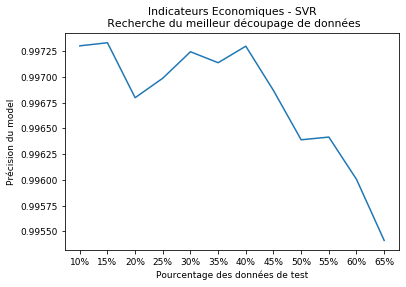

In [145]:
val1 = []
val2= []
for i in range(10, 70, 5):
    X_train_svr, X_test_svr, Y_train_svr, Y_test_svr = train_test_split(X, Y, test_size=i/100, random_state=0)
    val1.append('{}%'.format(i))
    model_svr_best.fit(X_train_svr, Y_train_svr)
    val2.append(model_svr_best.score(X_test_svr, Y_test_svr))

plt.plot(val1, val2)
plt.title("Indicateurs Economiques - SVR\n Recherche du meilleur découpage de données")
plt.xlabel("Pourcentage des données de test")
plt.ylabel("Précision du model")

In [169]:
X_train_svr, X_test_svr, Y_train_svr, Y_test_svr = train_test_split(X, Y, test_size=25/100, random_state=0)

In [170]:
model_svr_best.fit(X_train_svr, Y_train_svr)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fea207cb7d0>)])),
                ('pipeline',
                 Pipeline(steps=[('simpleimputer', SimpleImputer())])),
                ('svr', SVR(kernel='linear'))])

In [171]:
model_svr_best.score(X_test_svr, Y_test_svr)

0.9969878800952968

In [172]:
N_svr, train_score_svr, val_score_svr = learning_curve(model_svr_best, X_train_svr, Y_train_svr, train_sizes=np.linspace(0.2, 1, 10))

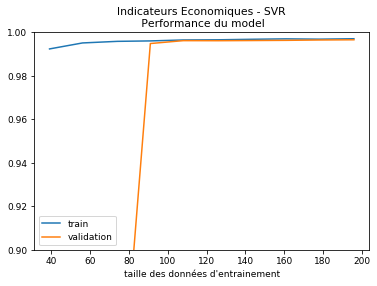

In [173]:
plt.plot(N_svr, train_score_svr.mean(axis=1), label='train')
plt.plot(N_svr, val_score_svr.mean(axis=1), label='validation')
plt.xlabel('taille des données d\'entrainement')
plt.ylim(0.9, 1)
plt.title('Indicateurs Economiques - SVR\n Performance du model')
plt.legend()

# Prédiction 2 - Regression linéaire

In [146]:
from sklearn.linear_model import LinearRegression

In [147]:
# On crée le pipeline
num_vars = make_column_selector(dtype_include=np.number)
numerical_pipeline = make_pipeline(StandardScaler())

preprocessor = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'))

model_lin = make_pipeline(preprocessor, LinearRegression())

params = {'linearregression__copy_X': [True, False]}

grid_lin = GridSearchCV(model_lin, params, cv=5)

grid_lin.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('pipeline',
   Pipeline(steps=[('simpleimputer', SimpleImputer())])),
  ('linearregression', LinearRegression())],
 'estimator__verbose': False,
 'estimator__pipeline': Pipeline(steps=[('simpleimputer', SimpleImputer())]),
 'estimator__linearregression': LinearRegression(),
 'estimator__pipeline__memory': None,
 'estimator__pipeline__steps': [('simpleimputer', SimpleImputer())],
 'estimator__pipeline__verbose': False,
 'estimator__pipeline__simpleimputer': SimpleImputer(),
 'estimator__pipeline__simpleimputer__add_indicator': False,
 'estimator__pipeline__simpleimputer__copy': True,
 'estimator__pipeline__simpleimputer__fill_value': None,
 'estimator__pipeline__simpleimputer__missing_values': nan,
 'estimator__pipeline__simpleimputer__strategy': 'mean',
 'estimator__pipeline__simpleimputer__verbose': 0,
 'estimator__linearregression__copy_X': True,
 'estimator__linearregression__fit_intercept': True,
 'es

In [148]:
grid_lin.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('simpleimputer',
                                                         SimpleImputer())])),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__copy_X': [True, False]})

In [149]:
grid_lin.best_score_

0.9981090376380308

In [150]:
grid_lin.score(X_test, Y_test)

0.9974024992699343

In [151]:
model_lin_best = grid_lin.best_estimator_

Text(0, 0.5, 'Précision du model')

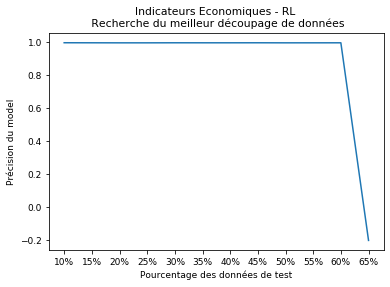

In [152]:
val1 = []
val2= []
for i in range(10, 70, 5):
    X_train_lin, X_test_lin, Y_train_lin, Y_test_lin = train_test_split(X, Y, test_size=i/100, random_state=0)
    val1.append('{}%'.format(i))
    model_lin_best.fit(X_train_lin, Y_train_lin)
    val2.append(model_lin_best.score(X_test_lin, Y_test_lin))

plt.plot(val1, val2)
plt.title("Indicateurs Economiques - RL \n Recherche du meilleur découpage de données")
plt.xlabel("Pourcentage des données de test")
plt.ylabel("Précision du model")

In [153]:
X_train_lin, X_test_lin, Y_train_lin, Y_test_lin = train_test_split(X, Y, test_size=25/100, random_state=0)

In [154]:
N_lin, train_score_lin, val_score_lin = learning_curve(model_lin_best, X_train_lin, Y_train_lin, train_sizes=np.linspace(0.2, 1, 10))

/home/jeremie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  """


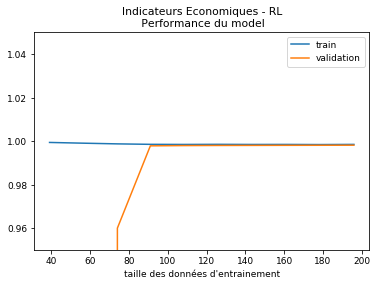

In [155]:
plt.plot(N_lin, train_score_lin.mean(axis=1), label='train')
plt.plot(N_lin, val_score_lin.mean(axis=1), label='validation')
plt.xlabel('taille des données d\'entrainement')
plt.title('Indicateurs Economiques - RL\n Performance du model')
plt.ylim(1, 1)
plt.legend()

# Prédiction 3 - algorithme de KNN

In [156]:
from sklearn.neighbors import KNeighborsRegressor as KNN

In [157]:
# On crée le pipeline
num_vars = make_column_selector(dtype_include=np.number)
numerical_pipeline = make_pipeline(StandardScaler())

preprocessor = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'))

model_knn = make_pipeline(preprocessor, KNN())

params = {'kneighborsregressor__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knn = GridSearchCV(model_knn, params, cv=5)

grid_knn.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('pipeline',
   Pipeline(steps=[('simpleimputer', SimpleImputer())])),
  ('kneighborsregressor', KNeighborsRegressor())],
 'estimator__verbose': False,
 'estimator__pipeline': Pipeline(steps=[('simpleimputer', SimpleImputer())]),
 'estimator__kneighborsregressor': KNeighborsRegressor(),
 'estimator__pipeline__memory': None,
 'estimator__pipeline__steps': [('simpleimputer', SimpleImputer())],
 'estimator__pipeline__verbose': False,
 'estimator__pipeline__simpleimputer': SimpleImputer(),
 'estimator__pipeline__simpleimputer__add_indicator': False,
 'estimator__pipeline__simpleimputer__copy': True,
 'estimator__pipeline__simpleimputer__fill_value': None,
 'estimator__pipeline__simpleimputer__missing_values': nan,
 'estimator__pipeline__simpleimputer__strategy': 'mean',
 'estimator__pipeline__simpleimputer__verbose': 0,
 'estimator__kneighborsregressor__algorithm': 'auto',
 'estimator__kneighborsregressor__lea

In [158]:
grid_knn.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('simpleimputer',
                                                         SimpleImputer())])),
                                       ('kneighborsregressor',
                                        KNeighborsRegressor())]),
             param_grid={'kneighborsregressor__algorithm': ['auto', 'ball_tree',
                                                            'kd_tree',
                                                            'brute']})

In [159]:
grid_knn.best_params_

{'kneighborsregressor__algorithm': 'auto'}

In [160]:
grid_knn.best_score_

0.9511056734413341

In [161]:
grid_knn.score(X_test,Y_test)

0.9450376730214036

In [162]:
model_knn_best = grid_knn.best_estimator_

Text(0, 0.5, 'Précision du model')

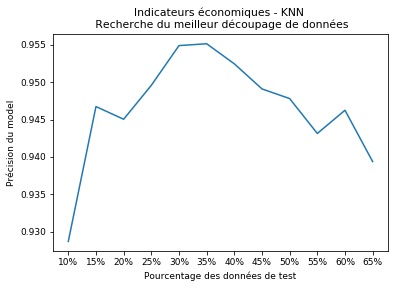

In [163]:
val1 = []
val2= []
for i in range(10, 70, 5):
    X_train_knn, X_test_knn, Y_train_knn, Y_test_knn = train_test_split(X, Y, test_size=i/100, random_state=0)
    val1.append('{}%'.format(i))
    model_knn_best.fit(X_train_knn, Y_train_knn)
    val2.append(model_knn_best.score(X_test_knn, Y_test_knn))

plt.plot(val1, val2)
plt.title("Indicateurs économiques - KNN \n Recherche du meilleur découpage de données")
plt.xlabel("Pourcentage des données de test")
plt.ylabel("Précision du model")

In [164]:
X_train_knn, X_test_knn, Y_train_knn, Y_test_knn = train_test_split(X, Y, test_size=25/100, random_state=0)

In [165]:
model_knn_best.fit(X_train_knn, Y_train_knn)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('simpleimputer', SimpleImputer())])),
                ('kneighborsregressor', KNeighborsRegressor())])

In [166]:
model_knn_best.score(X_test_knn, Y_test_knn)

0.9495691820993473

In [167]:
N_knn, train_score_knn, val_score_knn = learning_curve(model_knn_best, X_train_knn, Y_train_knn, train_sizes=np.linspace(0.2, 1, 10))

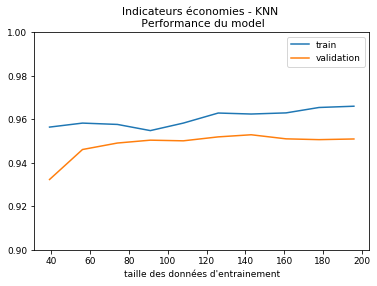

In [168]:
plt.plot(N_knn, train_score_knn.mean(axis=1), label='train')
plt.plot(N_knn, val_score_knn.mean(axis=1), label='validation')
plt.xlabel('taille des données d\'entrainement')
plt.ylim(0.9, 1)
plt.title('Indicateurs économies - KNN \n Performance du model')
plt.legend()